In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

plt.style.use("dark_background")

def f(x):
    return np.sin(2*np.pi*x)
# end

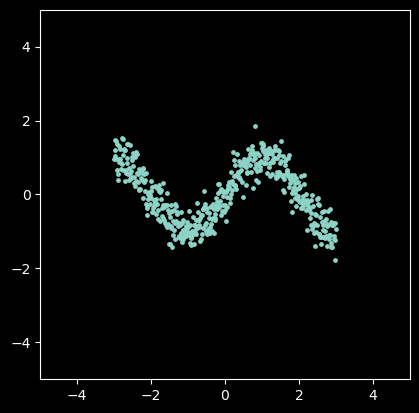

In [2]:
markersize = 6

nPts = 500

m = 1
b = 0

x = np.linspace(-3, 3, nPts)
#y = m*x + b + np.random.normal(0, 0.5, nPts)
#y = 0.5*x**2 - 2 + np.random.normal(0, 0.3, nPts)
y = np.sin(2*np.pi*x/4) + np.random.normal(0, 0.3, nPts)

X = x[:,np.newaxis]

plt.scatter(x, y, label='Data', s=markersize);
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.gca().set_aspect('equal')

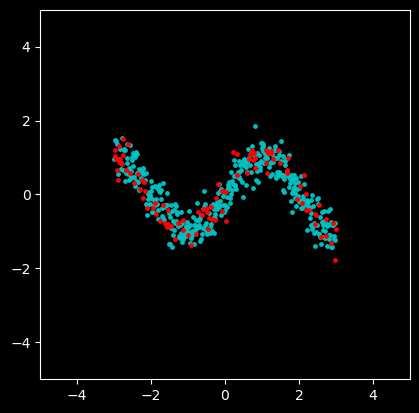

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_ext = np.linspace(-5, 5, 1000)[:,np.newaxis]

plt.scatter(X_train[:,0], y_train, label='Training Data', c='c', s=markersize);
plt.scatter(X_test[:,0], y_test, label='Testing Data', c='r', s=markersize);
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.gca().set_aspect('equal')

In [4]:
# train the models
from sklearn.tree import DecisionTreeRegressor, plot_tree

max_max_depth = 100

r2_train = []
r2_test  = []
for i in range(1,max_max_depth+1):
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(X_train,y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)
    
    r2_train.append( r2_score(y_train,y_train_pred) )
    r2_test.append( r2_score(y_test,y_test_pred) )
# end

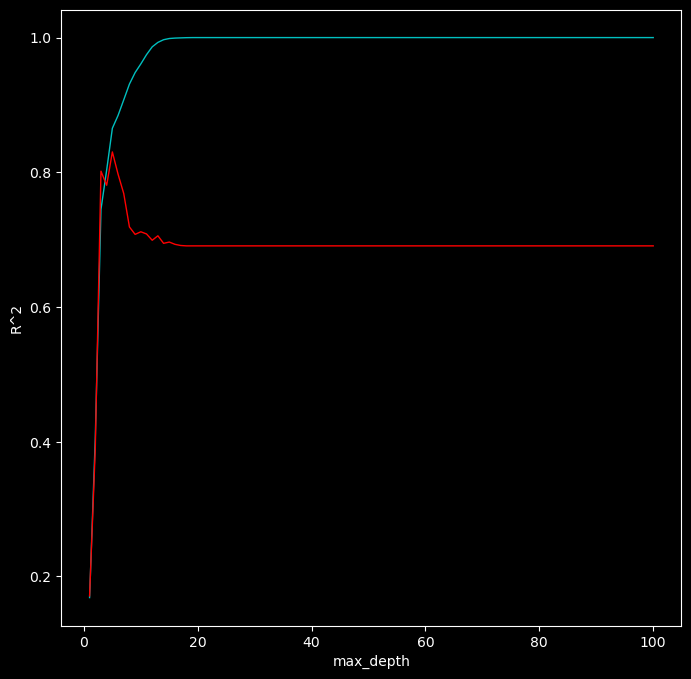

In [6]:
# plot the results

plt.figure(figsize=(8,8))

plt.plot(np.arange(max_max_depth)+1,
             r2_train,
             'c',
             linewidth=1)
plt.plot(np.arange(max_max_depth)+1,
             r2_test,
             'r',
             linewidth=1)
plt.xlabel("max_depth");
plt.ylabel("R^2");